In [ ]:
!git clone https://github.com/hiive/mlrose.git
%cd mlrose
!pip install -e.
%cd ..

Cloning into 'mlrose'...
remote: Enumerating objects: 2638, done.
remote: Counting objects: 100% (428/428), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 2638 (delta 272), reused 362 (delta 243), pack-reused 2210
Receiving objects: 100% (2638/2638), 1.98 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (1848/1848), done.
/content/mlrose
Obtaining file:///content/mlrose
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mlrose-hiive
/content


In [10]:
%cd mlrose
import mlrose_hiive as mlrose
%cd ..

/content/mlrose
/content


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import numpy as np
import matplotlib.pyplot as plt
import math
fitness = mlrose.OneMax()
problem = mlrose.DiscreteOpt(length = 200, fitness_fn = fitness, maximize=True, max_val=2)

In [ ]:
problem = mlrose.DiscreteOpt(length = 200, fitness_fn = fitness, maximize=True, max_val=2)

In [14]:
def get_props(runner):
  times = []
  fevals = []
  fitness = []
  for i in range(42, 343, 100):
    print(i)
    runner.seed = i
    stats, curves = runner.run()
    times.append(curves.Time.values)
    fevals.append(curves.FEvals.values)
    fitness.append(curves.Fitness.values)
  return times, fevals, fitness

In [20]:
mt = []
st = []

mfe = []
sfe = []

mf = []
sf = []
for r in [0.1, 0.25, 0.5, 0.75, 1]:
  rhc = mlrose.RHCRunner(problem=problem,
                        experiment_name='countones_ra',
                        output_directory="results/countones_ga",
                        seed=None,
                        iteration_list=2 ** np.arange(14),
                        max_attempts=2000,
                        max_iters = 2000,
                        restart_list=[0], learning_rate = r)
  times, fevals, fitness = get_props(rhc)
  mt.append(np.mean(times, axis = 0))
  st.append(np.std(times, axis = 0))

  mfe.append(np.mean(fevals, axis = 0))
  sfe.append(np.std(fevals, axis = 0))

  mf.append(np.mean(fitness, axis = 0))
  sf.append(np.std(fitness, axis = 0))

rmt, rst, rmfe, rsfe, rmf, rsf = mt, st, mfe, sfe, mf, sf

42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


In [6]:
def parameter_selection_plots(means, stds, names, parameters, cs, title):
  fig, ax = plt.subplots(1, len(means), figsize =(len(means) * 5, 5))
  i = 0
  for ms,ss,n in zip(means, stds, names):
    # Plotting
    for m, s, p, c in zip(ms, ss, parameters, cs):
      ax[i].fill_between(range(1, len(m) + 1), m - s, m + s, color=c, alpha=0.3)
      ax[i].plot(range(1, len(m) + 1), m, color=c, label = str(p))
      ax[i].set_xlabel('Iteration')
      ax[i].set_ylabel(n)
      if i == 2:
        ax[i].set_ylim([75, 220])
      ax[i].legend()

    i += 1
  fig.suptitle(title)


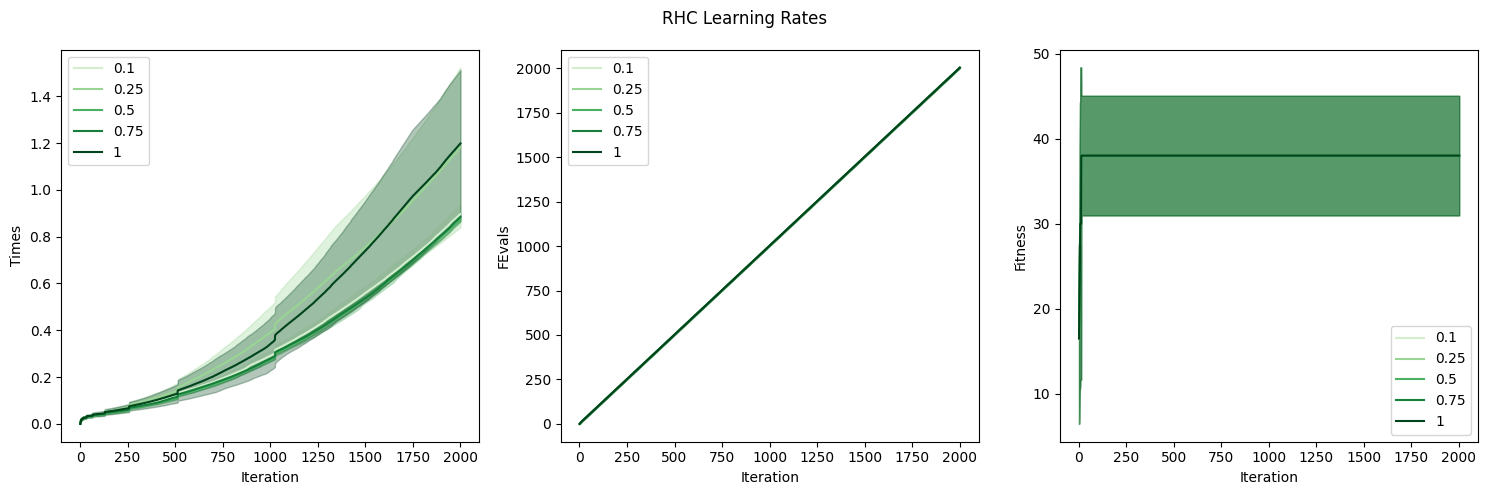

In [21]:
parameter_selection_plots([rmt, rmfe, rmf], [rst, rsfe, rsf], ["Times", "FEvals", "Fitness"], [0.1, 0.25, 0.5, 0.75, 1], plt.cm.Greens(np.linspace(0.2, 1, 5)), 'RHC Learning Rates')

## SA

In [ ]:
mt = []
st = []

mfe = []
sfe = []

mf = []
sf = []
for r in [0.1, 0.25, 0.5, 0.75, 1]:
  sa = mlrose.SARunner(problem=problem,
                        experiment_name='countones_sa',
                        output_directory=None,
                        seed=None,
                        iteration_list=2 ** np.arange(14),
                        max_iters=2000,
                       max_attempts=2000,
                        temperature_list=[250],
                        decay_list=[mlrose.GeomDecay],
                        learning_rates = [r])
  times, fevals, fitness = get_props(sa)
  mt.append(np.mean(times, axis = 0))
  st.append(np.std(times, axis = 0))

  mfe.append(np.mean(fevals, axis = 0))
  sfe.append(np.std(fevals, axis = 0))

  mf.append(np.mean(fitness, axis = 0))
  sf.append(np.std(fitness, axis = 0))

smt, sst, smfe, ssfe, smf, ssf = mt, st, mfe, sfe, mf, sf

42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


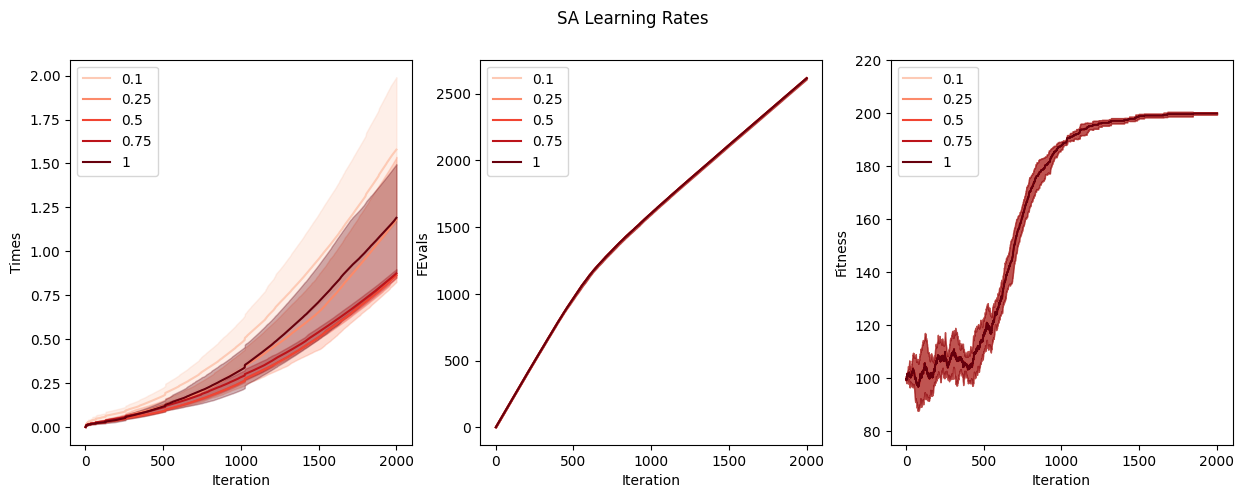

In [ ]:
parameter_selection_plots([smt, smfe, smf], [sst, ssfe, ssf], ["Times", "FEvals", "Fitness"], [0.1, 0.25, 0.5, 0.75, 1], plt.cm.Reds(np.linspace(0.2, 1, 5)),'SA Learning Rates')

In [ ]:
mt = []
st = []

mfe = []
sfe = []

mf = []
sf = []
for r in [1, 5, 10, 50, 100, 250]:
  sa = mlrose.SARunner(problem=problem,
                        experiment_name='countones_sa',
                        output_directory=None,
                        seed=None,
                        iteration_list=2 ** np.arange(14),
                        max_iters=2000,
                       max_attempts=2000,
                        temperature_list=[r],
                        decay_list=[mlrose.GeomDecay],
                        learning_rate = 0.5)
  times, fevals, fitness = get_props(sa)
  mt.append(np.mean(times, axis = 0))
  st.append(np.std(times, axis = 0))

  mfe.append(np.mean(fevals, axis = 0))
  sfe.append(np.std(fevals, axis = 0))

  mf.append(np.mean(fitness, axis = 0))
  sf.append(np.std(fitness, axis = 0))

smt, sst, smfe, ssfe, smf, ssf = mt, st, mfe, sfe, mf, sf

42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


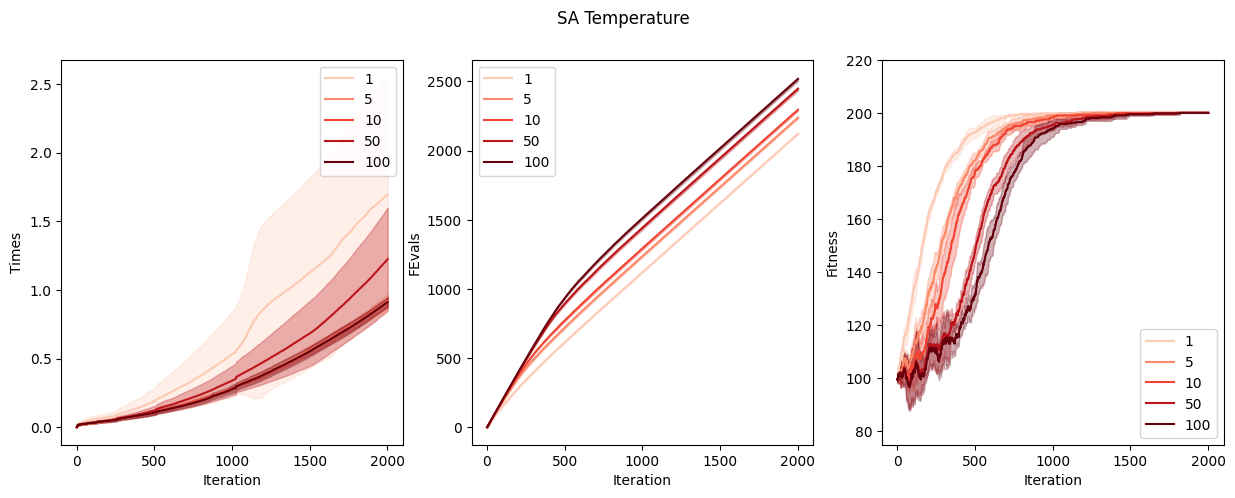

In [ ]:
parameter_selection_plots([smt, smfe, smf], [sst, ssfe, ssf], ["Times", "FEvals", "Fitness"], [1, 5, 10, 50, 100, 250], plt.cm.Reds(np.linspace(0.2, 1, 5)),'SA Temperature')

## GA

In [ ]:
mt = []
st = []

mfe = []
sfe = []

mf = []
sf = []
for r in [0.1, 0.25, 0.5, 0.75, 1]:
  sa = mlrose.GARunner(problem=problem,
                        experiment_name='countones_ga',
                        output_directory=None,
                        seed=None,
                        iteration_list=2 ** np.arange(14),
                        max_iters=2000,
                        max_attempts=2000,
                        population_sizes =[100],
                        mutation_rates = [r])
  times, fevals, fitness = get_props(sa)
  mt.append(np.mean(times, axis = 0))
  st.append(np.std(times, axis = 0))

  mfe.append(np.mean(fevals, axis = 0))
  sfe.append(np.std(fevals, axis = 0))

  mf.append(np.mean(fitness, axis = 0))
  sf.append(np.std(fitness, axis = 0))

gmt, gst, gmfe, gsfe, gmf, gsf = mt, st, mfe, sfe, mf, sf

42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


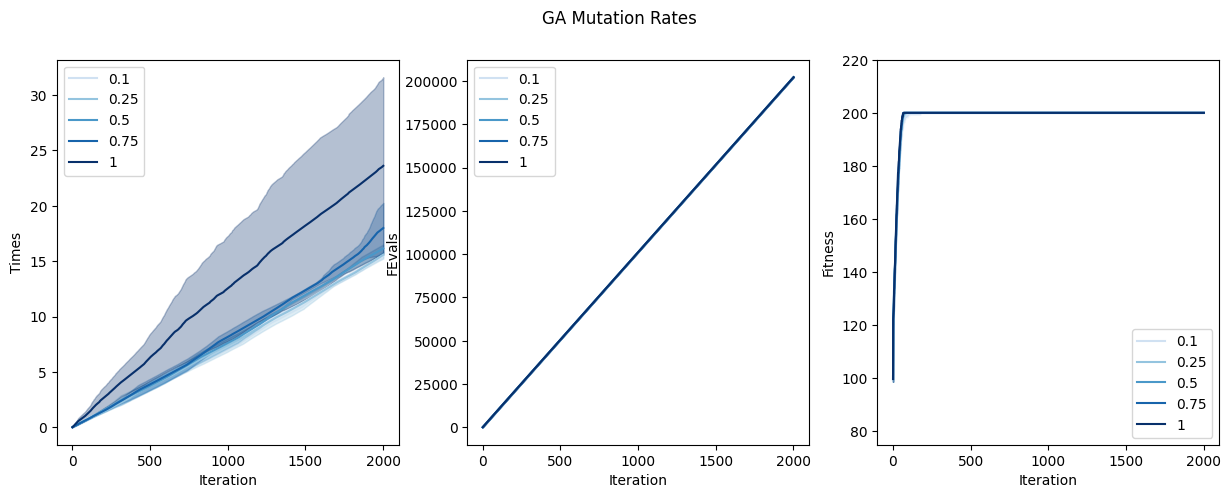

In [ ]:
parameter_selection_plots([gmt, gmfe, gmf], [gst, gsfe, gsf], ["Times", "FEvals", "Fitness"], [0.1, 0.25, 0.5, 0.75, 1], plt.cm.Blues(np.linspace(0.2, 1, 5)), "GA Mutation Rates")

## MIMIC

In [ ]:
mt = []
st = []

mfe = []
sfe = []

mf = []
sf = []
for r in [0.1, 0.2, 0.3, 0.5]:
  mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           output_directory="results/CustomTSP_problem",
                           seed=None,
                           iteration_list=2 ** np.arange(14),
                           population_sizes=[100],
                           max_iters = 1000,
                           max_attempts=1000,
                           keep_percent_list=[r],
                           use_fast_mimic=True)

  times, fevals, fitness = get_props(mimic)
  mt.append(np.mean(times, axis = 0))
  st.append(np.std(times, axis = 0))

  mfe.append(np.mean(fevals, axis = 0))
  sfe.append(np.std(fevals, axis = 0))

  mf.append(np.mean(fitness, axis = 0))
  sf.append(np.std(fitness, axis = 0))

mmt, mst, mmfe, msfe, mmf, msf = mt, st, mfe, sfe, mf, sf

42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


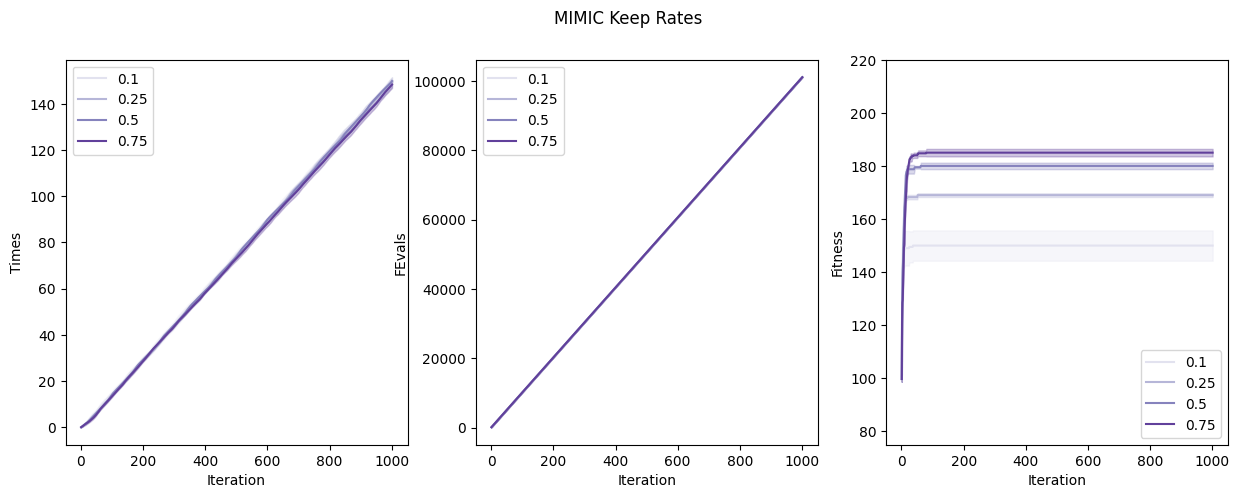

In [ ]:
parameter_selection_plots([mmt, mmfe, mmf], [mst, msfe, msf], ["Times", "FEvals", "Fitness"], [0.1, 0.25, 0.5, 0.75, 1], plt.cm.Purples(np.linspace(0.2, 1, 5)), "MIMIC Keep Rates")

## Variations with problem size

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import numpy as np
import matplotlib.pyplot as plt
import math
results = {}

for size in [20, 40, 60, 80, 100, 200]:
  fitness = mlrose.OneMax()
  problem = mlrose.DiscreteOpt(length = size, fitness_fn = fitness, maximize=True, max_val=2)

  print(size)
  results[size] = {'mean_time':[],
                  'sem_time':[],
                  'mean_feval':[],
                  'sem_feval':[],
                  'mean_fit':[],
                   'sem_fit':[]}
  rhc = mlrose.RHCRunner(problem=problem,
                        experiment_name='countones_ra',
                        output_directory="results/countones_ga",
                        seed=None,
                        iteration_list=2 ** np.arange(14),
                         early_stoppting = True,
                        max_attempts=200,
                        max_iters = 2000,
                        restart_list=[0], learning_rate = [0.75])
  times, fevals, fitness = get_props(rhc)
  results[size]["mean_time"].append(np.mean([i[-1] for i in times]))
  results[size]["sem_time"].append(np.std([i[-1] for i in times]) / np.sqrt(len(times)))
  results[size]["mean_feval"].append(np.mean([i[-1] for i in fevals]))
  results[size]["sem_feval"].append(np.std([i[-1] for i in fevals])/ np.sqrt(len(times)))
  results[size]["mean_fit"].append(np.mean([i[-1] for i in fitness]))
  results[size]["sem_fit"].append(np.std([i[-1] for i in fitness]) / np.sqrt(len(times)))


  sa = mlrose.SARunner(problem=problem,
                        experiment_name='countones_sa',
                        output_directory=None,
                        seed=None,
                       early_stoppting = True,
                        iteration_list=2 ** np.arange(14),
                        max_iters=2000,
                        max_attempts=2000,
                        temperature_list=[1],
                        decay_list=[mlrose.GeomDecay],
                        learning_rate = 0.5)
  times, fevals, fitness = get_props(sa)
  results[size]["mean_time"].append(np.mean([i[-1] for i in times]))
  results[size]["sem_time"].append(np.std([i[-1] for i in times]) / np.sqrt(len(times)))
  results[size]["mean_feval"].append(np.mean([i[-1] for i in fevals]))
  results[size]["sem_feval"].append(np.std([i[-1] for i in fevals])/ np.sqrt(len(times)))
  results[size]["mean_fit"].append(np.mean([i[-1] for i in fitness]))
  results[size]["sem_fit"].append(np.std([i[-1] for i in fitness]) / np.sqrt(len(times)))

  ga = mlrose.GARunner(problem=problem,
                        experiment_name='countones_ga',
                        output_directory=None,
                        seed=None,
                       early_stoppting = True,
                        iteration_list=2 ** np.arange(14),
                        max_iters=2000,
                        max_attempts=2000,
                        population_sizes =[100],
                        mutation_rates = [0.1])
  times, fevals, fitness = get_props(ga)

  results[size]["mean_time"].append(np.mean([i[-1] for i in times]))
  results[size]["sem_time"].append(np.std([i[-1] for i in times]) / np.sqrt(len(times)))
  results[size]["mean_feval"].append(np.mean([i[-1] for i in fevals]))
  results[size]["sem_feval"].append(np.std([i[-1] for i in fevals])/ np.sqrt(len(times)))
  results[size]["mean_fit"].append(np.mean([i[-1] for i in fitness]))
  results[size]["sem_fit"].append(np.std([i[-1] for i in fitness]) / np.sqrt(len(times)))

  mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           output_directory="results/CustomTSP_problem",
                           seed=None,
                             early_stoppting = True,
                           iteration_list=2 ** np.arange(14),
                           population_sizes=[100],
                           max_iters = 1000,
                           max_attempts=1000,
                           keep_percent_list=[0.75],
                           use_fast_mimic=True)

  times, fevals, fitness = get_props(mimic)
  results[size]["mean_time"].append(np.mean([i[-1] for i in times]))
  results[size]["sem_time"].append(np.std([i[-1] for i in times]) / np.sqrt(len(times)))
  results[size]["mean_feval"].append(np.mean([i[-1] for i in fevals]))
  results[size]["sem_feval"].append(np.std([i[-1] for i in fevals])/ np.sqrt(len(times)))
  results[size]["mean_fit"].append(np.mean([i[-1] for i in fitness]))
  results[size]["sem_fit"].append(np.std([i[-1] for i in fitness]) / np.sqrt(len(times)))


20
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
40
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
60
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
80
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
100
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
200
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


In [ ]:
import pickle

filename = "ONEMAX_RESULTS.pickle"

with open(filename, "wb") as f:
  pickle.dump(results, f)

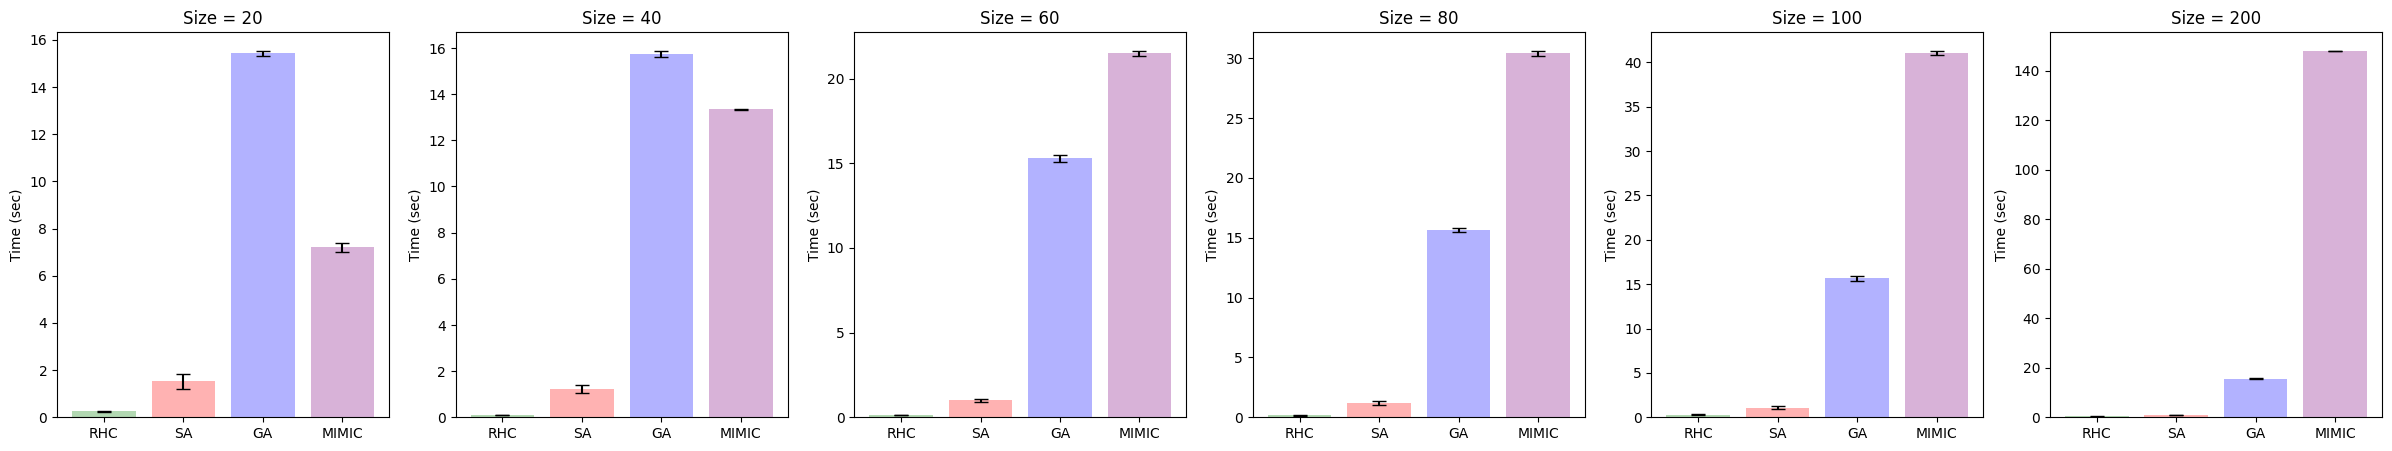

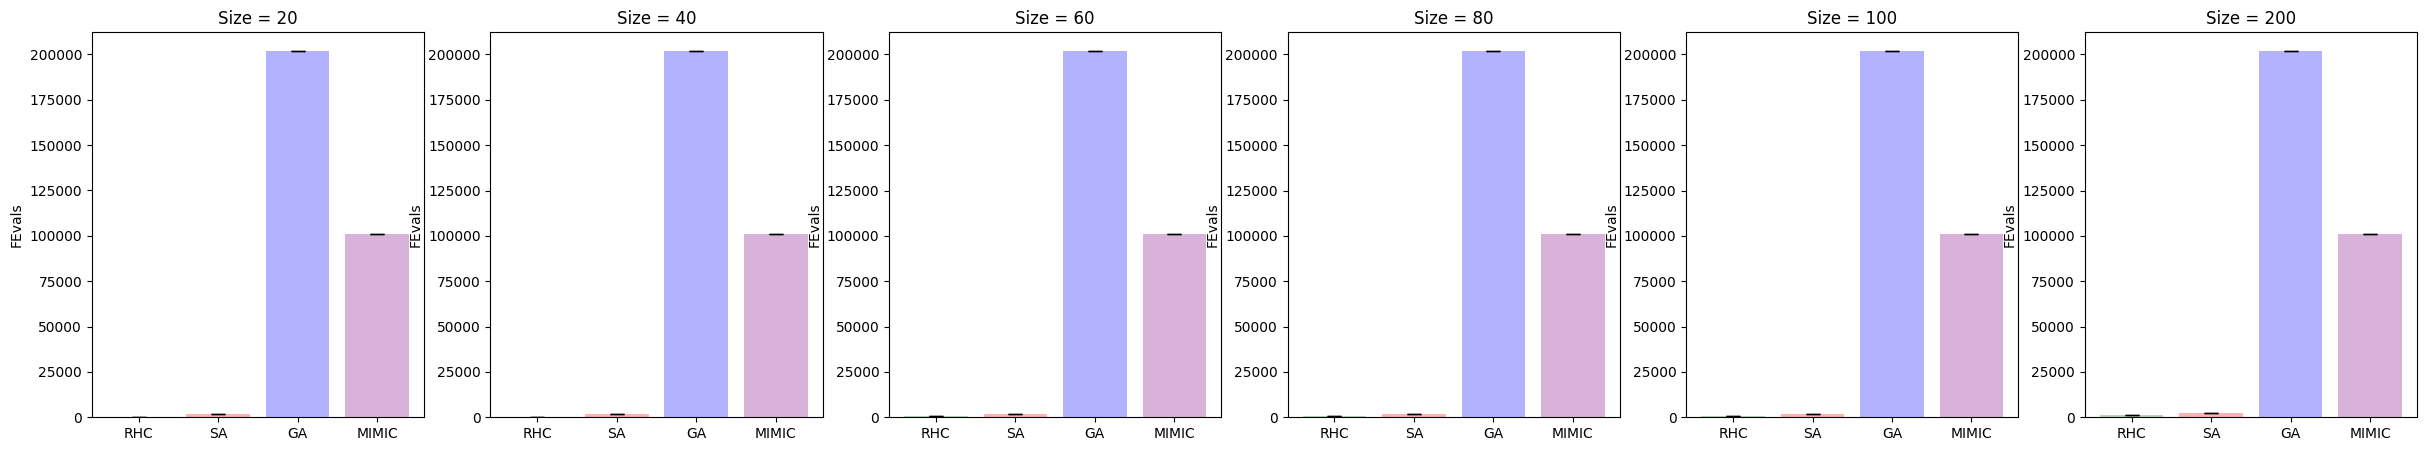

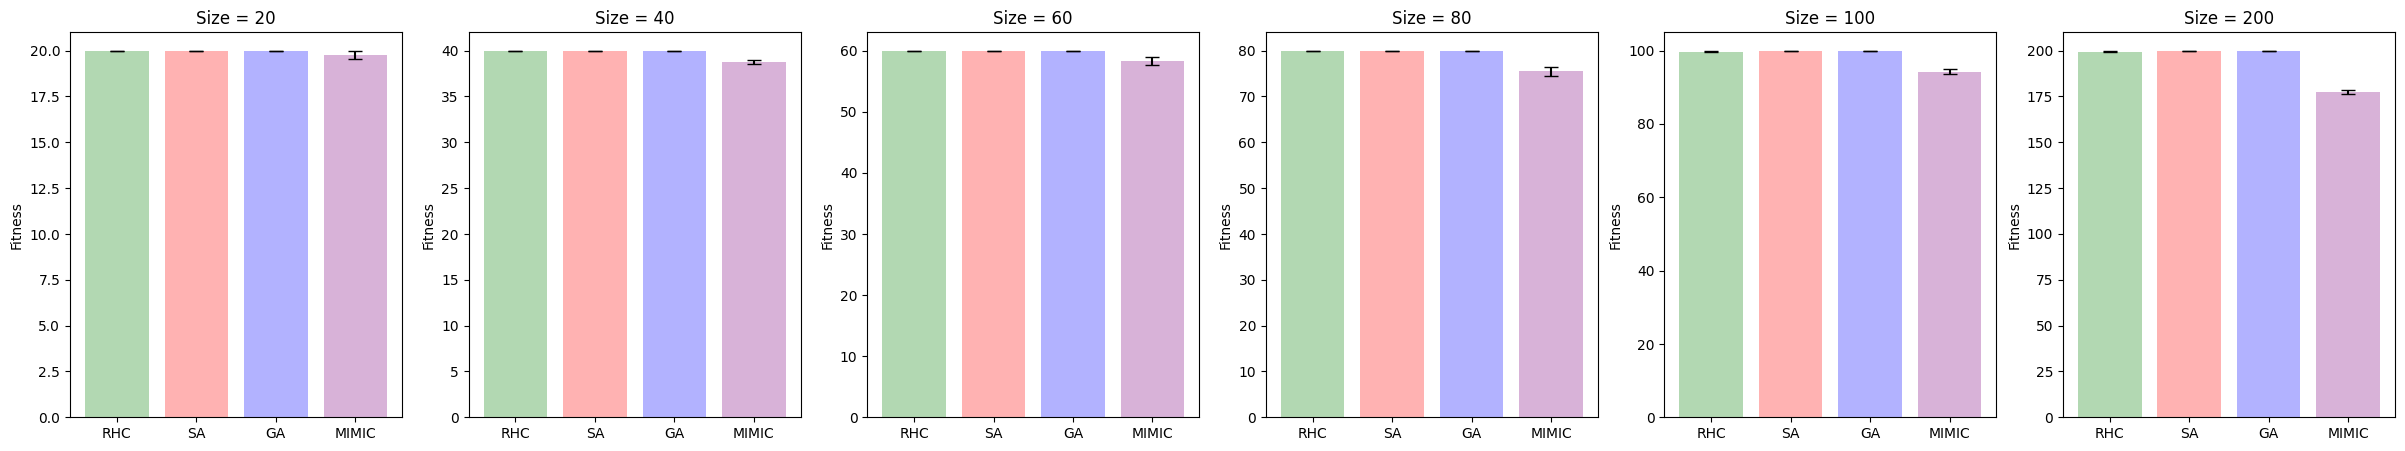

In [ ]:
import matplotlib.pyplot as plt
import pickle

filename = "ONEMAX_RESULTS.pickle"

with open(filename, "wb") as f:
  pickle.dump(results, f)

for j in [["mean_time", "sem_time"], ["mean_feval", "sem_feval"], ["mean_fit", "sem_fit"]]:
  k = 0
  fig, ax = plt.subplots(1,6, figsize=(30, 5))
  for i in results:

    ax[k].bar(x = ["RHC", "SA", "GA", "MIMIC"], height = results[i][j[0]],
            yerr = results[i][j[1]], capsize=5, color=["Green", "Red", "Blue", "Purple"], alpha=0.3)
    ax[k].set_ylabel("Time (sec)" if j[0] == "mean_time" else ("FEvals" if j[0] == "mean_feval" else "Fitness"))
    ax[k].set_title(f"Size = {[20, 40, 60, 80, 100, 200][k]}")
    k += 1

# Knapsack

In [12]:
def parameter_selection_plots(means, stds, names, parameters, cs, title):
  fig, ax = plt.subplots(1, len(means), figsize =(len(means) * 5, 5))
  i = 0
  for ms,ss,n in zip(means, stds, names):
    # Plotting
    for m, s, p, c in zip(ms, ss, parameters, cs):
      ax[i].fill_between(range(1, len(m) + 1), m - s, m + s, color=c, alpha=0.3)
      ax[i].plot(range(1, len(m) + 1), m, color=c, label = str(p))
      ax[i].set_xlabel('Iteration')
      ax[i].set_ylabel(n)
      # if i == 2:
      #   ax[i].set_ylim([75, 220])
      ax[i].legend()

    i += 1
  fig.suptitle(title)
  fig.tight_layout()

  plt.show()

In [84]:
%cd mlrose
import mlrose_hiive as mlrose
%cd ..

/content/mlrose
/content


In [93]:
import random


In [8]:
size = 10
random.seed(42)
weights = [random.randint(1, 25) for i in range(size)]
values = list(range(1, size+1))
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
problem = mlrose.DiscreteOpt(length=len(values), fitness_fn=fitness, maximize=True, max_val=2)

In [9]:
print(weights)

[21, 4, 1, 24, 9, 8, 8, 5, 24, 4]


In [10]:
mt = []
st = []

mfe = []
sfe = []

mf = []
sf = []
for r in [0.1, 0.2, 0.3, 0.5]:
  mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           output_directory="results/CustomTSP_problem",
                           seed=None,
                           iteration_list=2 ** np.arange(14),
                           population_sizes=[100],
                           max_iters = 100,
                           max_attempts=100,
                           keep_percent_list=[r],
                           use_fast_mimic=True)

  times, fevals, fitness = get_props(mimic)
  mt.append(np.mean(times, axis = 0))
  st.append(np.std(times, axis = 0))

  mfe.append(np.mean(fevals, axis = 0))
  sfe.append(np.std(fevals, axis = 0))

  mf.append(np.mean(fitness, axis = 0))
  sf.append(np.std(fitness, axis = 0))

mmt, mst, mmfe, msfe, mmf, msf = mt, st, mfe, sfe, mf, sf

42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


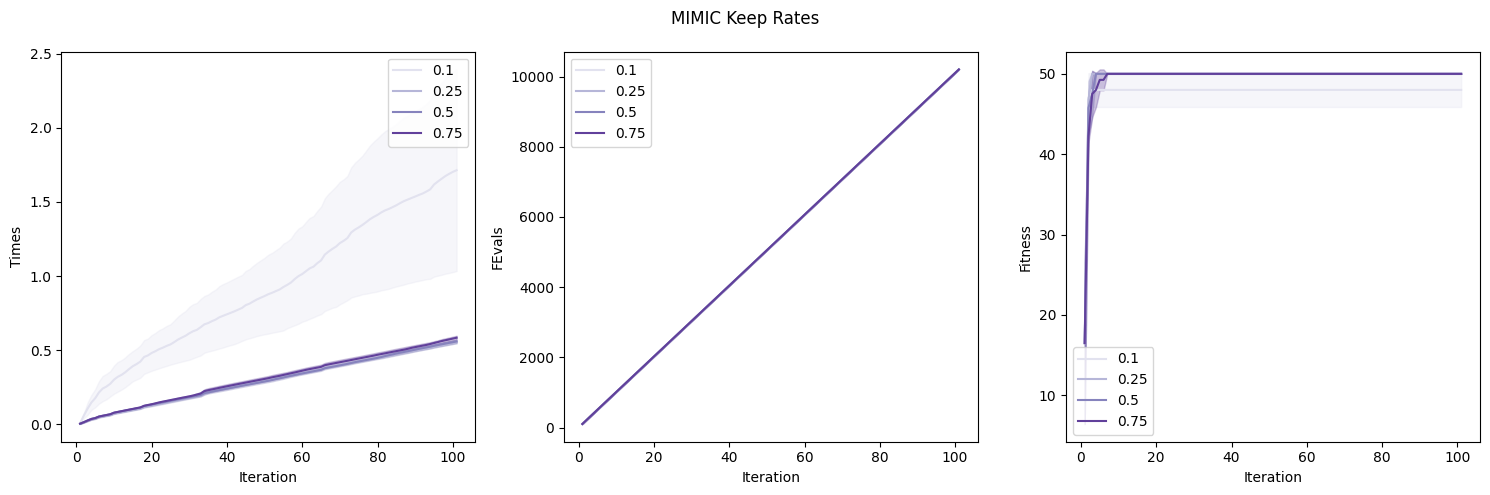

In [13]:
parameter_selection_plots([mmt, mmfe, mmf], [mst, msfe, msf], ["Times", "FEvals", "Fitness"], [0.1, 0.25, 0.5, 0.75, 1], plt.cm.Purples(np.linspace(0.2, 1, 5)), "MIMIC Keep Rates")

## GA

In [14]:
mt = []
st = []

mfe = []
sfe = []

mf = []
sf = []
for r in [0.1, 0.25, 0.5, 0.75, 1]:
  sa = mlrose.GARunner(problem=problem,
                        experiment_name='countones_ga',
                        output_directory=None,
                        seed=None,
                        iteration_list=2 ** np.arange(14),
                        max_iters=2000,
                        max_attempts=2000,
                        population_sizes =[100],
                        mutation_rates = [r])
  times, fevals, fitness = get_props(sa)
  mt.append(np.mean(times, axis = 0))
  st.append(np.std(times, axis = 0))

  mfe.append(np.mean(fevals, axis = 0))
  sfe.append(np.std(fevals, axis = 0))

  mf.append(np.mean(fitness, axis = 0))
  sf.append(np.std(fitness, axis = 0))

gmt, gst, gmfe, gsfe, gmf, gsf = mt, st, mfe, sfe, mf, sf

42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


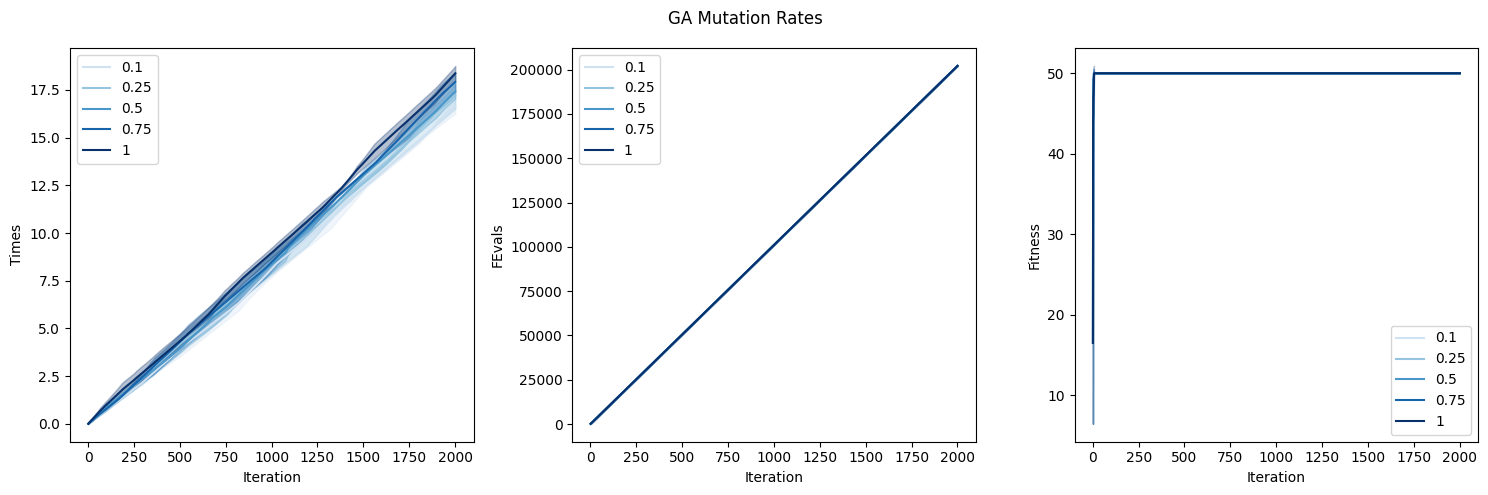

In [15]:
parameter_selection_plots([gmt, gmfe, gmf], [gst, gsfe, gsf], ["Times", "FEvals", "Fitness"], [0.1, 0.25, 0.5, 0.75, 1], plt.cm.Blues(np.linspace(0.2, 1, 5)), "GA Mutation Rates")

## SA

In [16]:
mt = []
st = []

mfe = []
sfe = []

mf = []
sf = []
for r in [1, 5, 10, 50, 100, 250]:
  sa = mlrose.SARunner(problem=problem,
                        experiment_name='countones_sa',
                        output_directory=None,
                        seed=None,
                        iteration_list=2 ** np.arange(14),
                        max_iters=2000,
                       max_attempts=2000,
                        temperature_list=[r],
                        decay_list=[mlrose.GeomDecay],
                        learning_rate = 0.5)
  times, fevals, fitness = get_props(sa)
  mt.append(np.mean(times, axis = 0))
  st.append(np.std(times, axis = 0))

  mfe.append(np.mean(fevals, axis = 0))
  sfe.append(np.std(fevals, axis = 0))

  mf.append(np.mean(fitness, axis = 0))
  sf.append(np.std(fitness, axis = 0))

smt, sst, smfe, ssfe, smf, ssf = mt, st, mfe, sfe, mf, sf

42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


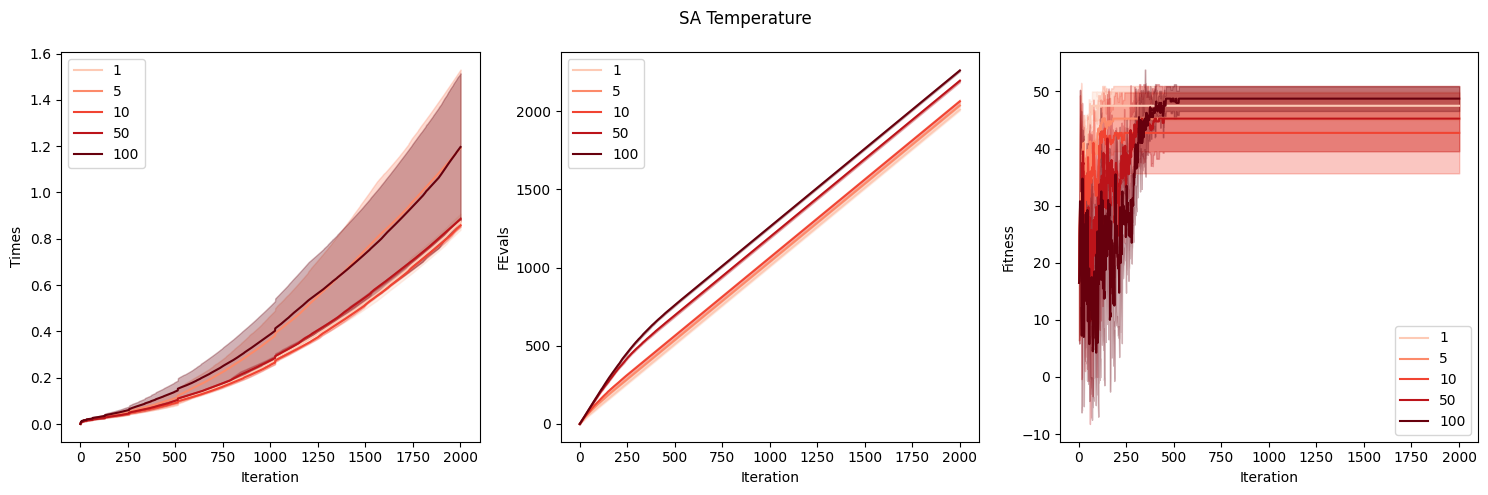

In [17]:
parameter_selection_plots([smt, smfe, smf], [sst, ssfe, ssf], ["Times", "FEvals", "Fitness"], [1, 5, 10, 50, 100, 250], plt.cm.Reds(np.linspace(0.2, 1, 5)),'SA Temperature')

## RHC

In [18]:
mt = []
st = []

mfe = []
sfe = []

mf = []
sf = []
for r in [0.1, 0.25, 0.5, 0.75, 1]:
  rhc = mlrose.RHCRunner(problem=problem,
                        experiment_name='countones_ra',
                        output_directory="results/countones_ga",
                        seed=None,
                        iteration_list=2 ** np.arange(14),
                        max_attempts=2000,
                        max_iters = 2000,
                        restart_list=[0], learning_rate = r)
  times, fevals, fitness = get_props(rhc)
  mt.append(np.mean(times, axis = 0))
  st.append(np.std(times, axis = 0))

  mfe.append(np.mean(fevals, axis = 0))
  sfe.append(np.std(fevals, axis = 0))

  mf.append(np.mean(fitness, axis = 0))
  sf.append(np.std(fitness, axis = 0))

rmt, rst, rmfe, rsfe, rmf, rsf = mt, st, mfe, sfe, mf, sf

42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


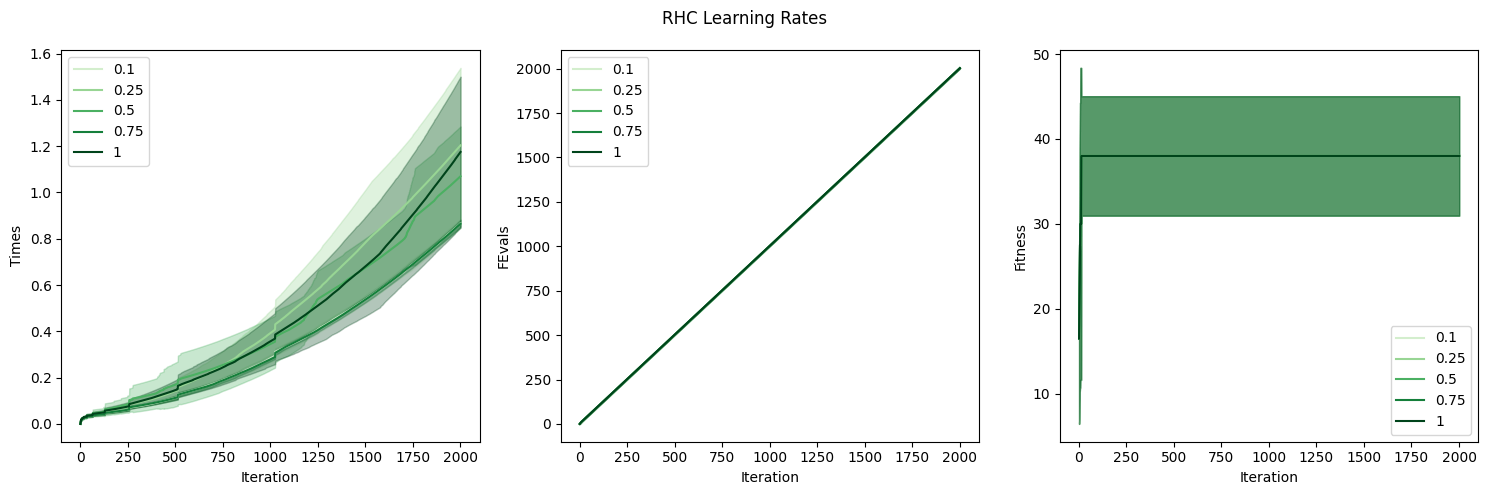

In [19]:
parameter_selection_plots([rmt, rmfe, rmf], [rst, rsfe, rsf], ["Times", "FEvals", "Fitness"], [0.1, 0.25, 0.5, 0.75, 1], plt.cm.Greens(np.linspace(0.2, 1, 5)), 'RHC Learning Rates')

## Generate results

In [1]:
%cd mlrose
import mlrose_hiive as mlrose
%cd ..

/content/mlrose
/content


In [2]:
def get_props(runner):
  times = []
  fevals = []
  fitness = []
  for i in range(42, 343, 100):
    print(i)
    runner.seed = i
    stats, curves = runner.run()
    times.append(curves.Time.values)
    fevals.append(curves.FEvals.values)
    fitness.append(curves.Fitness.values)
  return times, fevals, fitness

In [3]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import numpy as np
import matplotlib.pyplot as plt
import math
import random
results = {}

for size in [100, 200, 500, 1000]:
  random.seed(42)
  weights = [random.randint(1, 25) for i in range(size)]
  values = list(range(1, size+1))
  max_weight_pct = 0.6
  fitness = mlrose.Knapsack(weights, values, max_weight_pct)
  problem = mlrose.DiscreteOpt(length=len(values), fitness_fn=fitness, maximize=True, max_val=2)

  print(size)
  results[size] = {'mean_iters':[],
                   'sem_iters':[],
      'mean_time':[],
                  'sem_time':[],
                  'mean_feval':[],
                  'sem_feval':[],
                  'mean_fit':[],
                   'sem_fit':[]}
  rhc = mlrose.RHCRunner(problem=problem,
                        experiment_name='countones_ra',
                        output_directory="results/countones_ga",
                        seed=None,
                        iteration_list=2 ** np.arange(14),
                         early_stoppting = True,
                        max_attempts=20,
                        max_iters = 2000,
                        restart_list=[0], learning_rate = [0.75])
  times, fevals, fitness = get_props(rhc)
  results[size]["mean_iters"].append(np.mean([len(i) for i in times]))
  results[size]["sem_iters"].append(np.std([len(i) for i in times]) / np.sqrt(len(times)))
  results[size]["mean_time"].append(np.mean([i[-1] for i in times]))
  results[size]["sem_time"].append(np.std([i[-1] for i in times]) / np.sqrt(len(times)))
  results[size]["mean_feval"].append(np.mean([i[-1] for i in fevals]))
  results[size]["sem_feval"].append(np.std([i[-1] for i in fevals])/ np.sqrt(len(times)))
  results[size]["mean_fit"].append(np.mean([i[-1] for i in fitness]))
  results[size]["sem_fit"].append(np.std([i[-1] for i in fitness]) / np.sqrt(len(times)))


  sa = mlrose.SARunner(problem=problem,
                        experiment_name='countones_sa',
                        output_directory=None,
                        seed=None,
                       early_stoppting = True,
                        iteration_list=2 ** np.arange(14),
                        max_iters=2000,
                        max_attempts=20,
                        temperature_list=[100],
                        decay_list=[mlrose.GeomDecay],
                        learning_rate = 0.5)
  times, fevals, fitness = get_props(sa)
  results[size]["mean_iters"].append(np.mean([len(i) for i in times]))
  results[size]["sem_iters"].append(np.std([len(i) for i in times]) / np.sqrt(len(times)))
  results[size]["mean_time"].append(np.mean([i[-1] for i in times]))
  results[size]["sem_time"].append(np.std([i[-1] for i in times]) / np.sqrt(len(times)))
  results[size]["mean_feval"].append(np.mean([i[-1] for i in fevals]))
  results[size]["sem_feval"].append(np.std([i[-1] for i in fevals])/ np.sqrt(len(times)))
  results[size]["mean_fit"].append(np.mean([i[-1] for i in fitness]))
  results[size]["sem_fit"].append(np.std([i[-1] for i in fitness]) / np.sqrt(len(times)))

  ga = mlrose.GARunner(problem=problem,
                        experiment_name='countones_ga',
                        output_directory=None,
                        seed=None,
                       early_stoppting = True,
                        iteration_list=2 ** np.arange(14),
                        max_iters=2000,
                        max_attempts=20,
                        population_sizes =[100],
                        mutation_rates = [0.1])
  times, fevals, fitness = get_props(ga)
  results[size]["mean_iters"].append(np.mean([len(i) for i in times]))
  results[size]["sem_iters"].append(np.std([len(i) for i in times]) / np.sqrt(len(times)))
  results[size]["mean_time"].append(np.mean([i[-1] for i in times]))
  results[size]["sem_time"].append(np.std([i[-1] for i in times]) / np.sqrt(len(times)))
  results[size]["mean_feval"].append(np.mean([i[-1] for i in fevals]))
  results[size]["sem_feval"].append(np.std([i[-1] for i in fevals])/ np.sqrt(len(times)))
  results[size]["mean_fit"].append(np.mean([i[-1] for i in fitness]))
  results[size]["sem_fit"].append(np.std([i[-1] for i in fitness]) / np.sqrt(len(times)))

  mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC_final",
                           output_directory="results/CustomTSP_problem",
                           seed=None,
                             early_stoppting = True,
                           iteration_list=2 ** np.arange(14),
                           population_sizes=[100],
                           max_iters = 2000,
                           max_attempts=20,
                           keep_percent_list=[0.75],
                           use_fast_mimic=True)

  times, fevals, fitness = get_props(mimic)
  results[size]["mean_iters"].append(np.mean([len(i) for i in times]))
  results[size]["sem_iters"].append(np.std([len(i) for i in times]) / np.sqrt(len(times)))
  results[size]["mean_time"].append(np.mean([i[-1] for i in times]))
  results[size]["sem_time"].append(np.std([i[-1] for i in times]) / np.sqrt(len(times)))
  results[size]["mean_feval"].append(np.mean([i[-1] for i in fevals]))
  results[size]["sem_feval"].append(np.std([i[-1] for i in fevals])/ np.sqrt(len(times)))
  results[size]["mean_fit"].append(np.mean([i[-1] for i in fitness]))
  results[size]["sem_fit"].append(np.std([i[-1] for i in fitness]) / np.sqrt(len(times)))


100
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
200
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
500
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342
1000
42
142
242
342
42
142
242
342
42
142
242
342
42
142
242
342


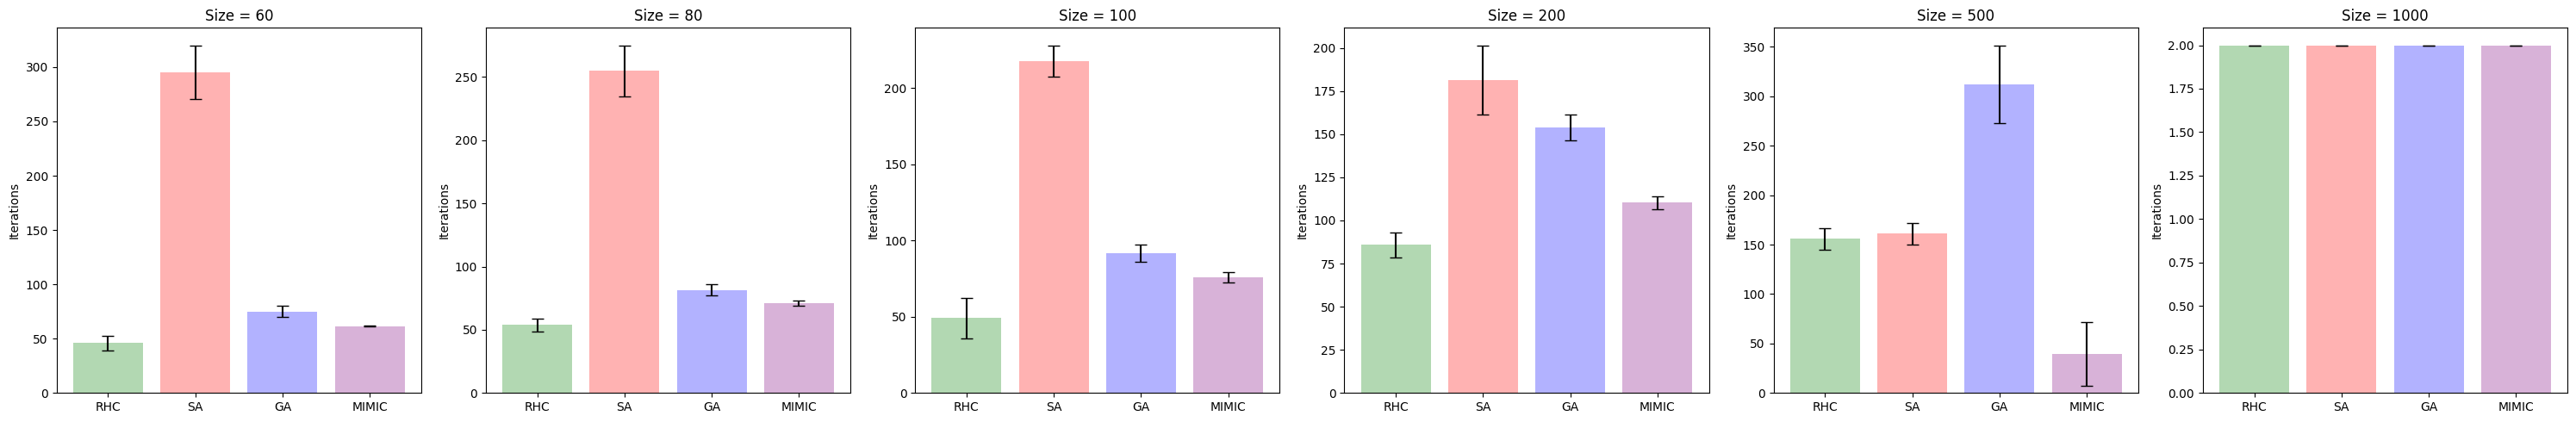

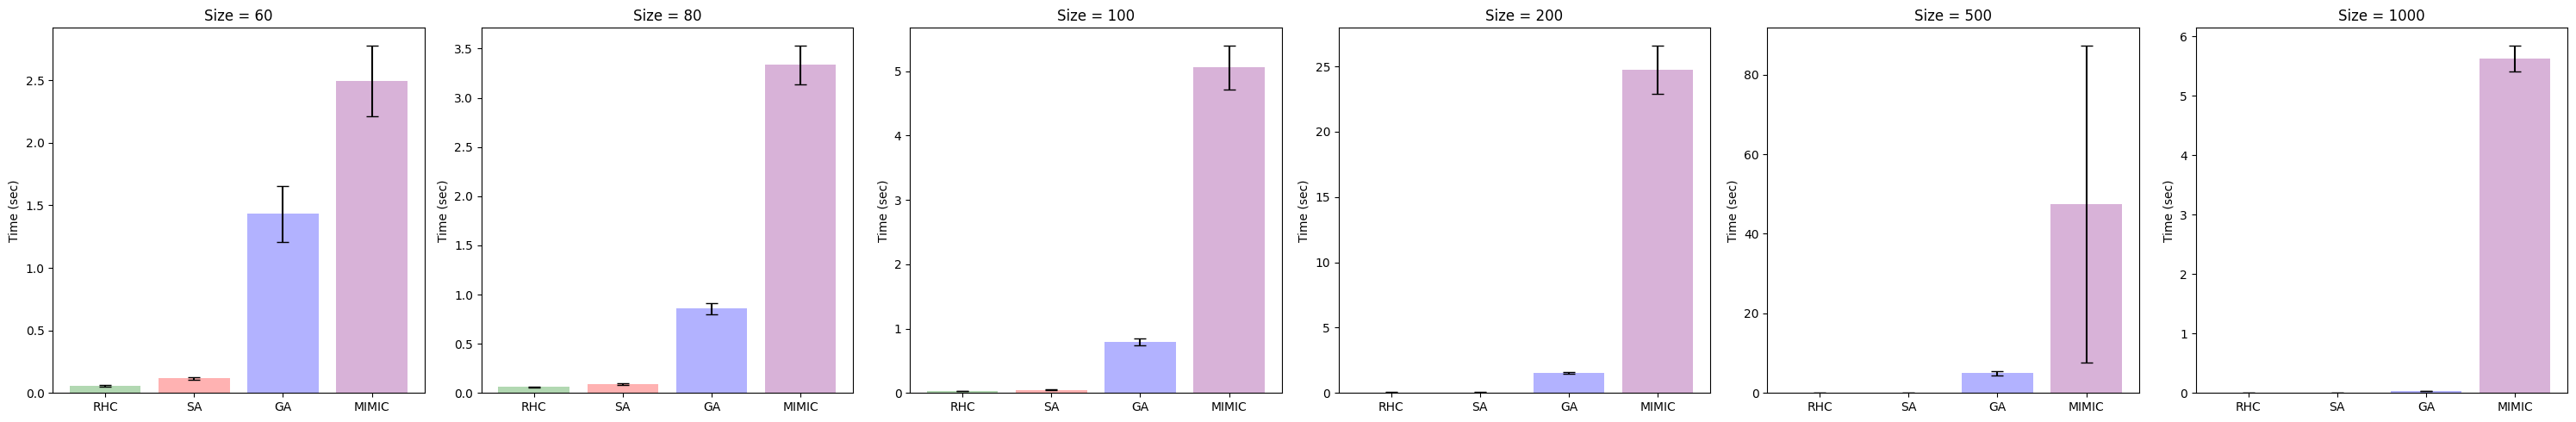

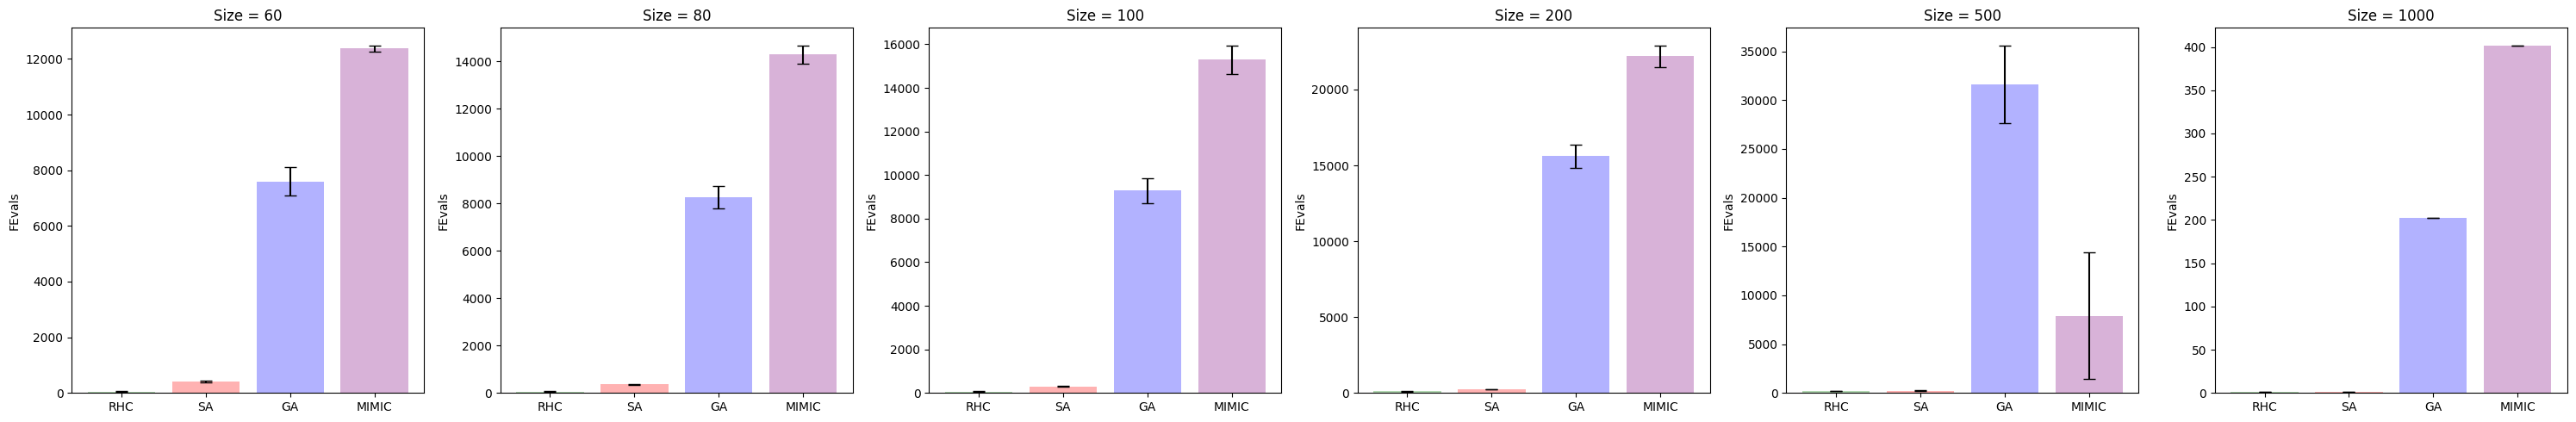

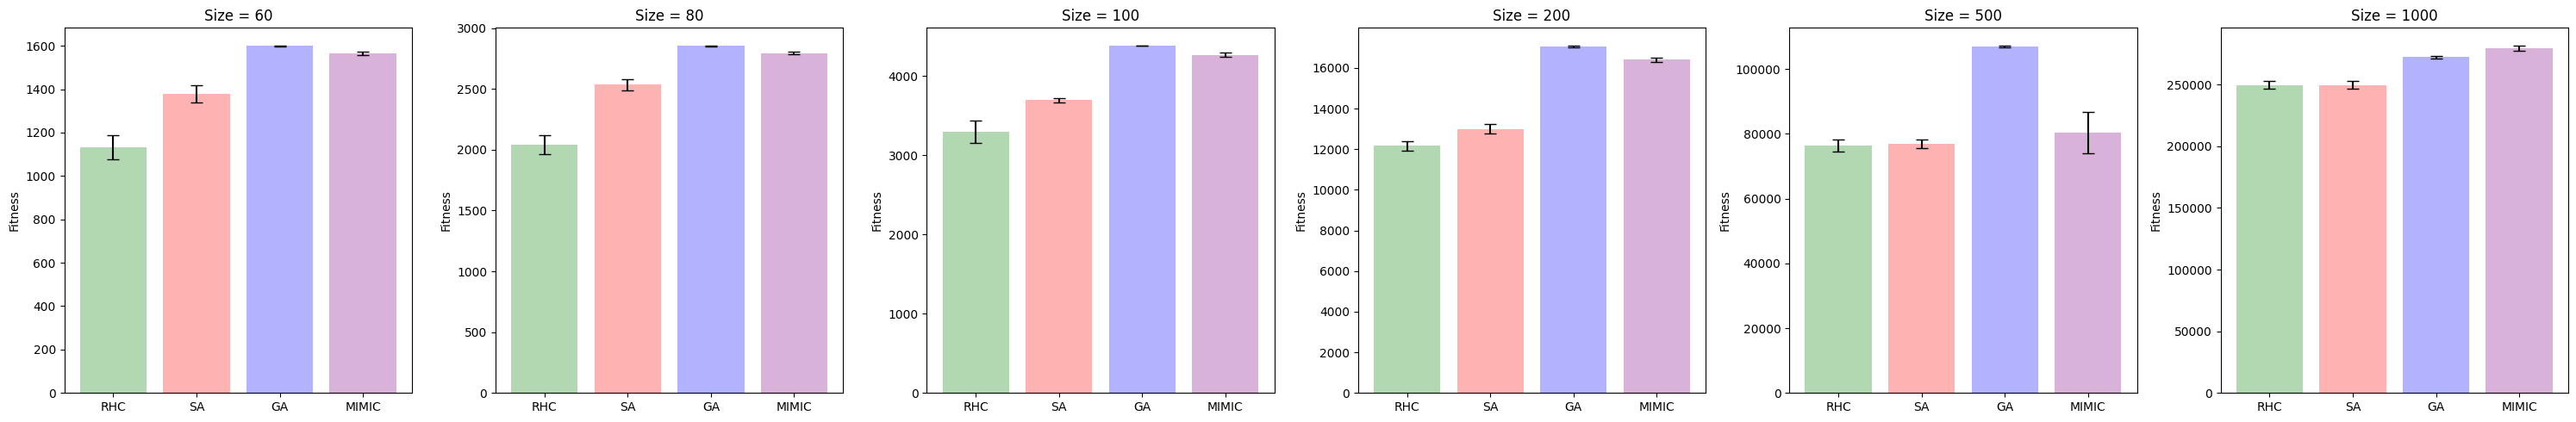

In [128]:
import matplotlib.pyplot as plt
import pickle

filename = "KNAPSACK_RESULTS.pickle"

with open(filename, "wb") as f:
  pickle.dump(results, f)

for j in [["mean_iters", "sem_iters"], ["mean_time", "sem_time"], ["mean_feval", "sem_feval"], ["mean_fit", "sem_fit"]]:
  k = 0
  fig, ax = plt.subplots(1,6, figsize=(30, 5))

  for i in results:

    ax[k].bar(x = ["RHC", "SA", "GA", "MIMIC"], height = results[i][j[0]],
            yerr = results[i][j[1]], capsize=5, color=["Green", "Red", "Blue", "Purple"], alpha=0.3)
    ax[k].set_ylabel("Time (sec)" if j[0] == "mean_time" else ("FEvals" if j[0] == "mean_feval" else ("Fitness" if j[0] == "mean_fit" else "Iterations")))
    ax[k].set_title(f"Size = {[60, 80, 100, 200, 500, 1000][k]}")
    k += 1
  fig.tight_layout()

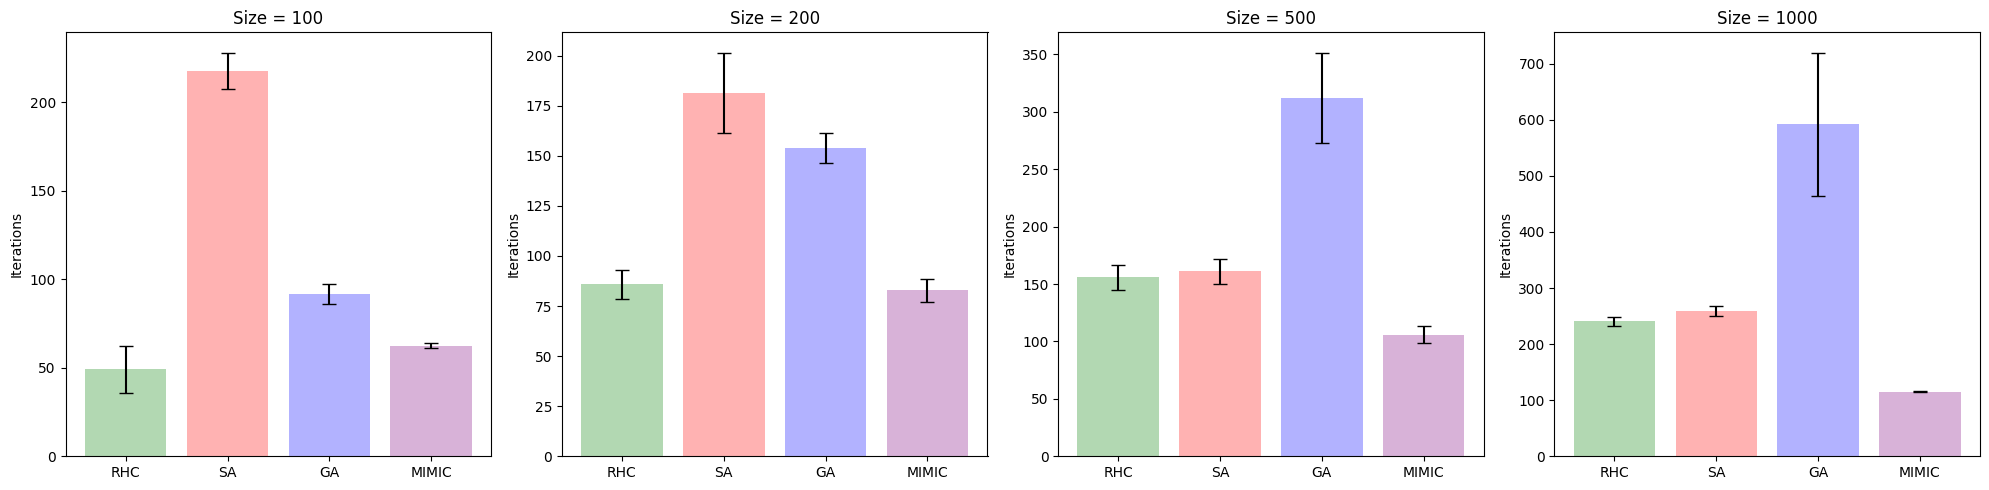

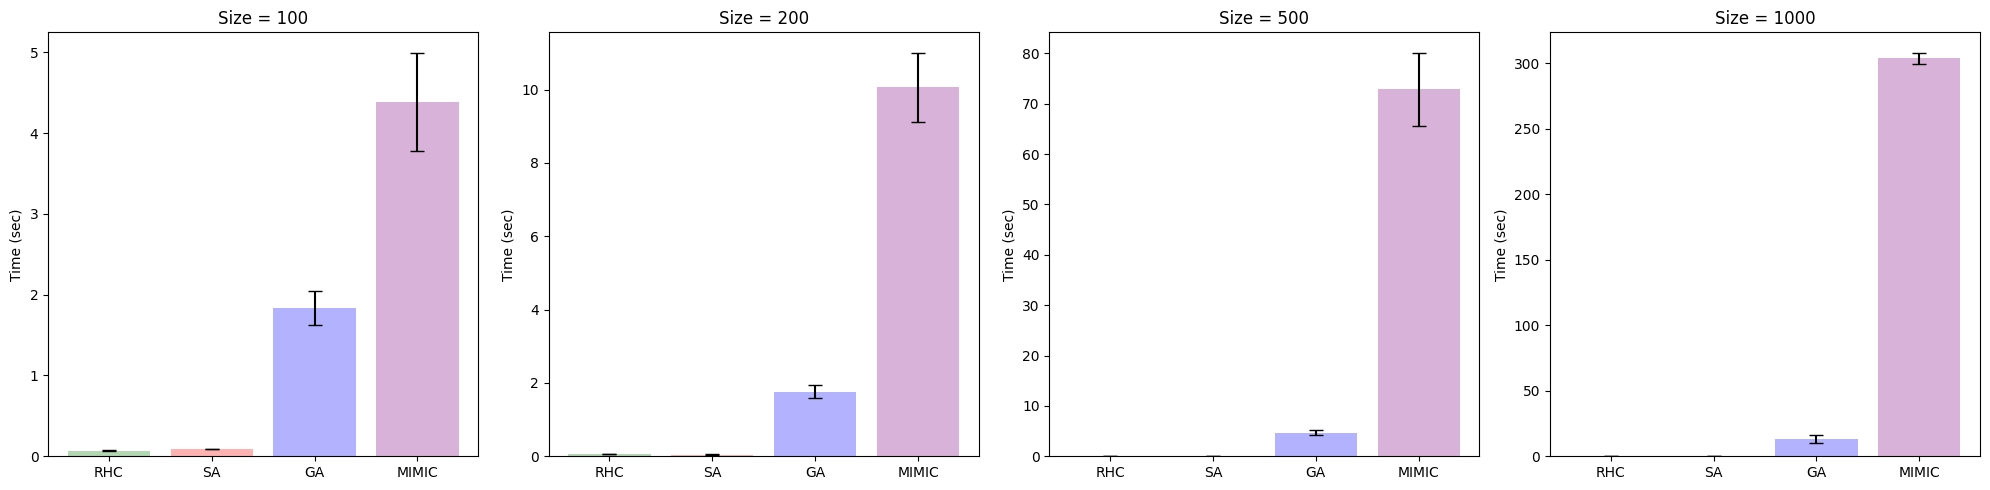

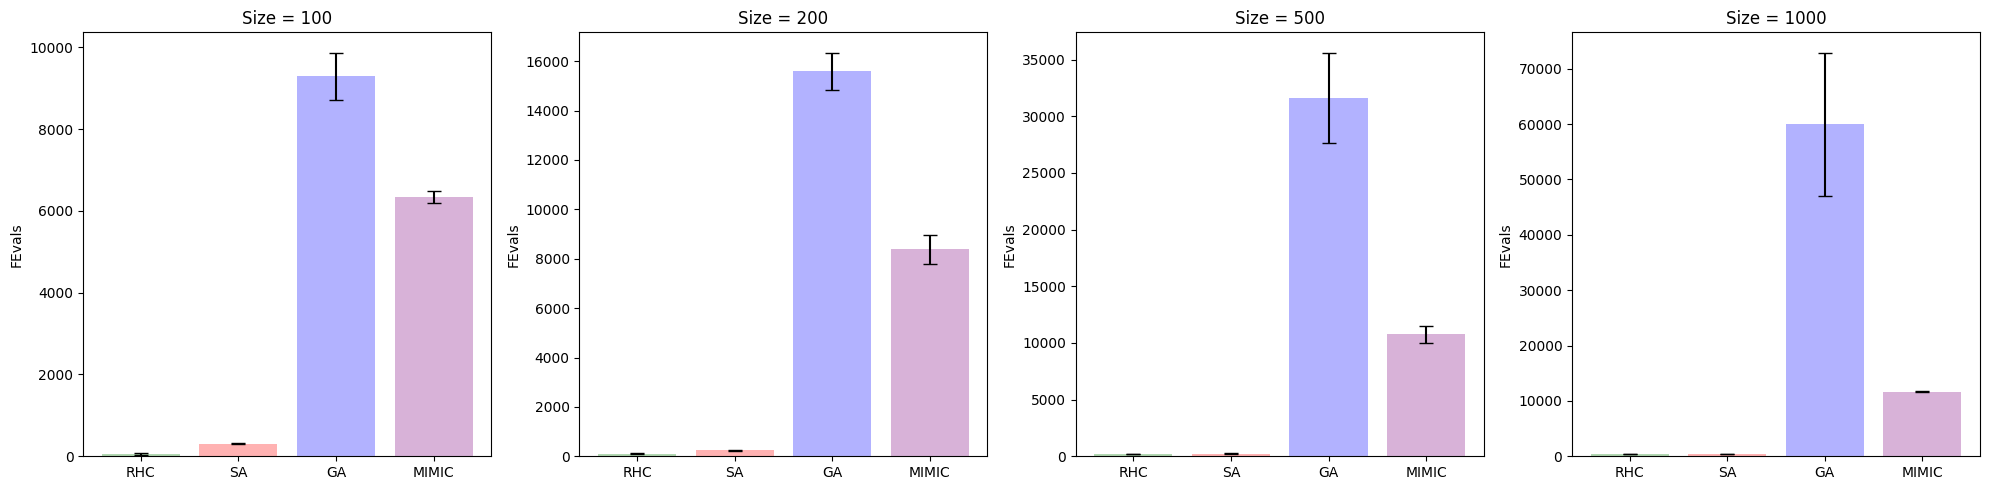

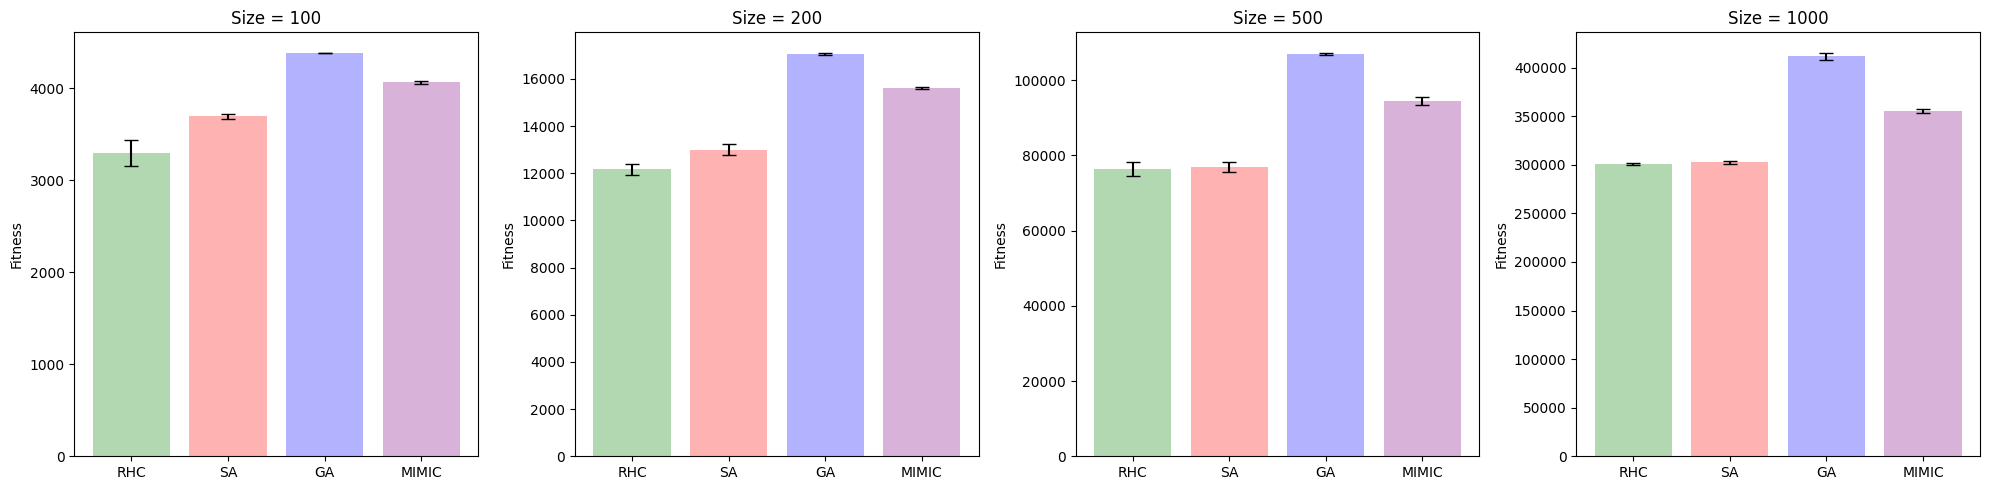

In [6]:
import matplotlib.pyplot as plt
import pickle

filename = "KNAPSACK_RESULTS1.pickle"

with open(filename, "wb") as f:
  pickle.dump(results, f)

for j in [["mean_iters", "sem_iters"], ["mean_time", "sem_time"], ["mean_feval", "sem_feval"], ["mean_fit", "sem_fit"]]:
  k = 0
  fig, ax = plt.subplots(1,4, figsize=(20, 5))

  for i in results:

    ax[k].bar(x = ["RHC", "SA", "GA", "MIMIC"], height = results[i][j[0]],
            yerr = results[i][j[1]], capsize=5, color=["Green", "Red", "Blue", "Purple"], alpha=0.3)
    ax[k].set_ylabel("Time (sec)" if j[0] == "mean_time" else ("FEvals" if j[0] == "mean_feval" else ("Fitness" if j[0] == "mean_fit" else "Iterations")))
    ax[k].set_title(f"Size = {[100, 200, 500, 1000][k]}")
    k += 1
  fig.tight_layout()